In [1]:
import jax
import jax.numpy as jnp
from flax import linen as nn

In [2]:

import torchvision.transforms as transforms

from torch.utils.data import TensorDataset, ConcatDataset, random_split, DataLoader, Dataset

import numpy as np
import matplotlib.pyplot as plt

In [3]:
x = jnp.ones(1)

In [15]:
class Generator(nn.Module):
    """Generator network."""
    @nn.compact
    def __call__(self, x):
        x = nn.Dense(256)(x)
        x = nn.relu(x)

        x = nn.Dense(784)(x)
        x = nn.tanh(x)

        g_out_mat = jnp.zeros((1, 28, 28))
        m = 0
        n = 0
        for i in range(len(x)):
            if i % 28 == 0 and i != 0:
                m += 1
                n = 0
            g_out_mat = g_out_mat.at[0, m, n].set(x[i])
            n += 1
        return g_out_mat

In [31]:
generator = Generator()
params = generator.init(jax.random.PRNGKey(2), x)

In [32]:
generator.apply(params, x)

Array([[[-1.25952689e-02, -4.87354368e-01, -3.46462160e-01,
         -8.91848505e-01,  7.24832892e-01, -9.25186336e-01,
          6.05974793e-01, -8.02427903e-02,  1.49672121e-01,
         -6.20351613e-01,  7.98926234e-01, -4.22841132e-01,
          5.91002405e-01,  5.51098406e-01,  3.64718467e-01,
          1.70733839e-01, -1.15463920e-01,  7.34263420e-01,
          3.48181993e-01, -6.72973916e-02,  3.71261865e-01,
          5.67916930e-01, -9.74903703e-01,  7.99817264e-01,
          2.03636080e-01,  8.10456753e-01, -2.44973544e-02,
          2.44187877e-01],
        [-7.36517489e-01, -4.36737418e-01,  3.37877184e-01,
         -4.36896503e-01,  1.40226811e-01,  3.90387475e-01,
          1.54113829e-01,  2.97347426e-01,  3.53680886e-02,
          8.30385625e-01,  2.06461817e-01,  1.11221775e-01,
         -6.25118613e-01, -7.39962161e-02, -5.71197510e-01,
         -7.78341413e-01,  6.04701638e-01, -5.74018657e-01,
          6.16907835e-01, -7.07194090e-01, -2.36193195e-01,
          3.2

In [54]:
mu, sigma = 0, 1
key = jax.random.PRNGKey(0)
noise_value = value = sigma * jax.random.normal(key, (1,)) + mu

In [55]:
g_out = generator.apply(params, noise_value)

In [56]:
def plot_img(img):
    img = np.array(img)
    img = img / 2 + 0.5
    npimg = img
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

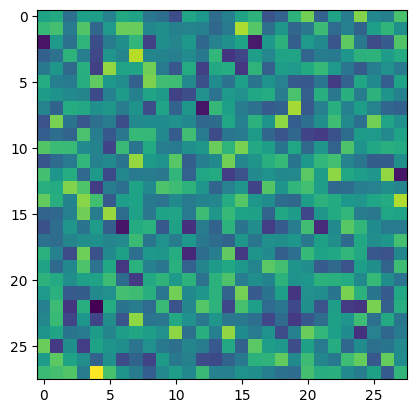

(None, Array(0, dtype=int32, weak_type=True))

In [66]:
plot_img(g_out), jnp.array(0)

In [58]:
noise_value

Array([-0.20584226], dtype=float32)

In [60]:
noise_tensor = jax.random.normal(key, shape=(70000, 1))

In [69]:
gen_images = jnp.zeros((70000, 1, 28, 28))

In [72]:
gen_images = jax.vmap(generator.apply, in_axes=(None, 0))(params, noise_tensor)

KeyboardInterrupt: 

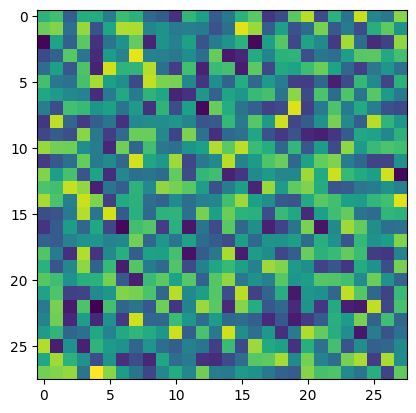

In [71]:
plot_img(gen_images[0])